In [1]:
import numpy as np 
import pandas as pd

import os

In [2]:
!pip install wolta

  Using cached wolta-0.3.5-py3-none-any.whl.metadata (960 bytes)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached py4j-0.10.9.8-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached wolta-0.3.5-py3-none-any.whl (17 kB)
Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
Using cached future-1.0.0-py3-none-any.whl (491 kB)
Using cached py4j-0.10.9.8-py2.py3-none-any.whl (202 kB)


In [3]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\bank-full.csv', sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
from wolta.data_tools import col_types

types = col_types(df, print_columns=True)

age: int64
job: str
marital: str
education: str
default: str
balance: int64
housing: str
loan: str
contact: str
day: int64
month: str
duration: int64
campaign: int64
pdays: int64
previous: int64
poutcome: str
y: str


In [9]:
from wolta.data_tools import seek_null
seeked = seek_null(df, print_columns=True)

In [10]:
from wolta.data_tools import unique_amounts
unique_amounts(df)

{'age': 77,
 'job': 12,
 'marital': 3,
 'education': 4,
 'default': 2,
 'balance': 7168,
 'housing': 2,
 'loan': 2,
 'contact': 3,
 'day': 31,
 'month': 12,
 'duration': 1573,
 'campaign': 48,
 'pdays': 559,
 'previous': 41,
 'poutcome': 4,
 'y': 2}

In [11]:
from wolta.data_tools import make_null
df = make_null(df, 'unknown')

In [12]:
seeked = seek_null(df, print_columns=True)

job has 288 null values
education has 1857 null values
contact has 13020 null values
poutcome has 36959 null values


In [13]:
from wolta.feature_tools import list_deletings
df = list_deletings(df)

The maximum tolerated null value amount is 9042
contact will be deleted because it has 13020 null values and this is 3978 values more than tolerance
poutcome will be deleted because it has 36959 null values and this is 27917 values more than tolerance
The maximum tolerated unique value amount is 4521 in string data


In [14]:
df['job'] = df['job'].fillna('unknown')
df['education'] = df['education'].fillna('unknown')

In [15]:
from wolta.data_tools import make_numerics

df['y'], outs = make_numerics(df['y'], space_requested=True)

print(outs)
outs = list(outs)
print(outs)

{'no': 0, 'yes': 1}
['no', 'yes']


In [16]:
types = col_types(df)
loc = 0

for col in df.columns:
    if types[loc] == 'str':
        df[col] = make_numerics(df[col])

    loc += 1

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,0,0,0,0,2143,0,0,5,0,261,1,-1,0,0
1,44,1,1,1,0,29,0,0,5,0,151,1,-1,0,0
2,33,2,0,1,0,2,0,1,5,0,76,1,-1,0,0
3,47,3,0,2,0,1506,0,0,5,0,92,1,-1,0,0
4,33,4,1,2,0,1,1,0,5,0,198,1,-1,0,0


In [19]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.526133,0.513238,1.049944,0.018027,1362.272058,0.444162,0.160226,15.806419,2.940722,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3.098343,0.692948,0.968986,0.133049,3044.765829,0.496878,0.366820,8.322476,3.179741,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,8.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,0.000000,448.000000,0.000000,0.000000,16.000000,2.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,6.000000,1.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,5.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [20]:
from wolta.data_tools import stat_sum

stat_sum(df,
        ['max', 'min', 'width', 'var', 'med'])

age
max: 95
min: 18
width: 77
variance: 112.75561324142626
median: 39.0
***
job
max: 11
min: 0
width: 11
variance: 9.599519449603267
median: 3.0
***
marital
max: 2
min: 0
width: 2
variance: 0.4801669306053761
median: 0.0
***
education
max: 3
min: 0
width: 3
variance: 0.938913701448196
median: 1.0
***
default
max: 1
min: 0
width: 1
variance: 0.017701628631153626
median: 0.0
***
balance
max: 102127
min: -8019
width: 110146
variance: 9270393.902627468
median: 448.0
***
housing
max: 1
min: 0
width: 1
variance: 0.24688209754555313
median: 0.0
***
loan
max: 1
min: 0
width: 1
variance: 0.13455396431633948
median: 0.0
***
day
max: 31
min: 1
width: 30
variance: 69.26207731009255
median: 16.0
***
month
max: 11
min: 0
width: 11
variance: 10.110529207642479
median: 2.0
***
duration
max: 4918
min: 0
width: 4918
variance: 66319.10717773928
median: 180.0
***
campaign
max: 63
min: 1
width: 62
variance: 9.597521105662384
median: 2.0
***
pdays
max: 871
min: -1
width: 872
variance: 10025.544018639399
med

In [21]:
from wolta.data_tools import corr_analyse

corr = corr_analyse(df, df.columns)

PERFECT
There is no relation!
************
STRONG
There is no relation!
************
WEAK
age - marital: -0.12635115745355707
age - education: 0.197850245381244
age - housing: 0.18551308153717477
job - education: 0.25954112735220464
marital - education: -0.10913250002270783
housing - month: 0.19425321056091022
housing - pdays: -0.1241784001201226
housing - y: 0.13917270249816985
day - campaign: 0.16249021632619287
month - pdays: 0.15637153460109227
month - previous: 0.11965338790066718
month - y: 0.1666633624893817
duration - y: 0.3945210158945621
pdays - previous: 0.45481963548050097
pdays - y: 0.10362149401628687
************
UNCORRELATED
age - job: 0.004261946491592203
age - default: -0.01787930360870591
age - balance: 0.0977827393713475
age - loan: -0.015655272656635792
age - day: -0.009120045633549519
age - month: 0.04939172259323977
age - duration: -0.004648428470616228
age - campaign: 0.004760311762456934
age - pdays: -0.023758014111736295
age - previous: 0.0012883192026639154
a

<Axes: xlabel='y'>

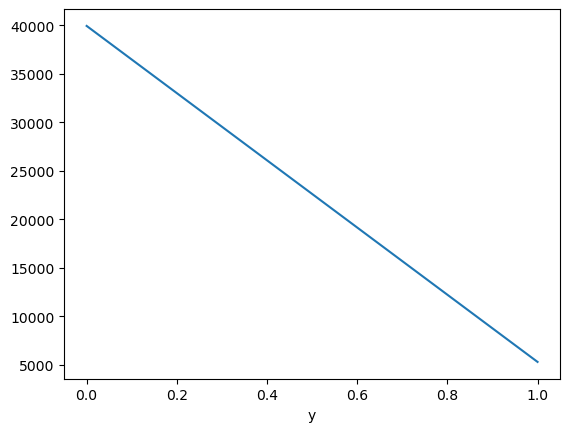

In [23]:
df['y'].value_counts().plot()

In [24]:
features = list(df.columns)
features.remove('y')

In [25]:
y = df['y'].values
del df['y']
X = df.values
del df

In [26]:
from sklearn.model_selection import train_test_split

X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
del X, y

In [27]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

Counter({0: 31937, 1: 4231})
Counter({0: 7985, 1: 1058})


In [28]:
train = pd.DataFrame(X_train_all, columns=features)
test = pd.DataFrame(X_test_all, columns=features)

for feature in features:
    if feature not in ['housing', 'month', 'duration', 'pdays']:
        del train[feature]
        del test[feature]


In [29]:
X_train_corr = train.values
X_test_corr = test.values

In [30]:
from wolta.model_tools import compare_models

results = compare_models('clf',
                        ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                        ['acc', 'precision', 'f1'],
                        X_train_all, y_train, X_test_all, y_test,
                        get_result=True)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy Score: 0.8901913081941834
Precision Score: 0.8721935801788222
F1 Score (weighted): 0.8768272588201896
***
CatBoost
Accuracy Score: 0.9027977441114674
Precision Score: 0.8919766319300805
F1 Score (weighted): 0.8951219581393121
***
LightGBM
Accuracy Score: 0.9033506579674887
Precision Score: 0.8927160097412734
F1 Score (weighted): 0.8958046452281248
***
Random Forest
Accuracy Score: 0.8993696782041358
Precision Score: 0.8851632579268279
F1 Score (weighted): 0.8881307678162528
***
Decision Tree
Accuracy Score: 0.8695123299789893
Precision Score: 0.8718664559337702
F1 Score (weighted): 0.8706611168404806
***
Extra Tree
Accuracy Score: 0.8565741457480924
Precision Score: 0.853914827417655
F1 Score (weighted): 0.8552174255344409
***
Ridge
Accuracy Score: 0.8860997456596262
Precision Score: 0.8554477324619769
F1 Score (weighted): 0.8497216476262031
***
Perceptron
Accuracy Score: 0.848280437907774
Precision Score: 0.8123575193680934
F1 Score (weighted): 0.8277904784374924
***

In [31]:
from wolta.model_tools import get_best_model

model = get_best_model(results, 'acc', 'clf', X_train_all, y_train, behavior='max-best')
y_pred = model.predict(X_test_all)

Best Algorithm is lbm with the score of 0.9033506579674887


In [32]:
from sklearn.metrics import classification_report as rep

print(rep(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.62      0.44      0.51      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.70      0.73      9043
weighted avg       0.89      0.90      0.90      9043



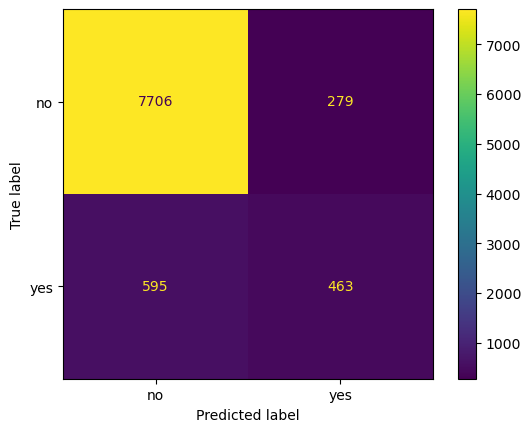

In [33]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_test, y_pred)
disp = cmd(confusion_matrix=cm, display_labels=outs)
disp.plot()